# 시청률 데이터 분석하기

1.   TV 방송의 데이터 속성들은 어떤 관계가 있을까?
2.   시청률과 다른 속성들의 관계를 시각화하여 보자!

In [1]:
# 한글 설치
# 실행 / 런타임=런타임 다시 시작 / 런타임-런타임 다시 시작 및 모두 실행
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 8 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 2 dirs
/usr/share/fonts/opentype: caching, new cache contents: 0 fonts, 2 dirs
/usr/share/fonts/opentype/font-awesome: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/opentype/mathjax: caching, new cache contents: 24 fonts, 0 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 5 dirs
/usr/share/fonts/truetype/font-awesome: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/glyphicons: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 di

#### 데이터 수집 https://racoi.or.kr/kobaco/excel/response.do
##### RACOI 사이트 접속(https://www.racoi.or.kr)  ›  인터넷 반응  ›인터넷 반응 DB
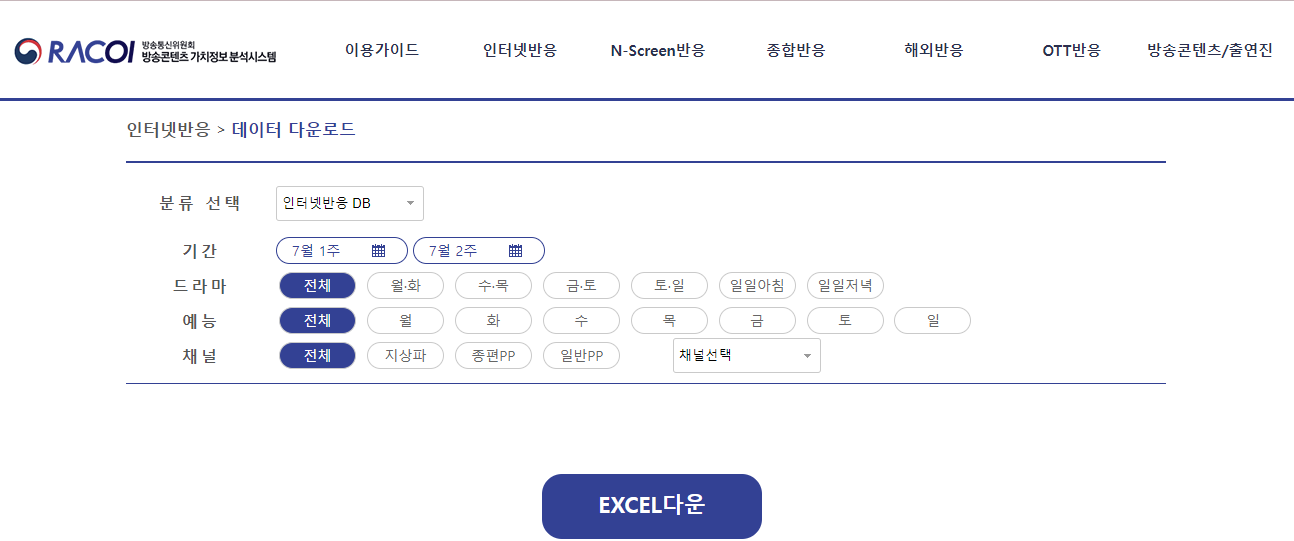

#### 인터넷반응 > 7월 1주~7월 2주 > 엑셀 다운


##### 엑셀 데이터 전처리(제목열 수정, 공백 제거 및 중복 확, 병합셀 확인) > csv 저장


1.  상단 공백 제거
2.  병합 제거
3.  사용하지 않는 속성 제거
4.  속성 이름 변경
5.  CSV파일로 저장


In [2]:
# (참고) 데이터 파일 업로드하기
# 파일 선택 창을 통해 파일(인터넷반응DB_2023년7월.CSV)을 불러오기
# from google.colab import files
# uploaded = files.upload()

In [3]:
# 데이터분석 시각화 라이브러리 불러오기
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
# 판다스 자료형 데이터프레임 형식으로 저장 및 확인
# df = pd.read_csv() #한글인코딩, 콤마제거
df = pd.read_csv('/content/인터넷반응DB_2023년7월1주_2023년7월2주.CSV', encoding='cp949')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   주차        243 non-null    int64  
 1   프로그램명     243 non-null    object 
 2   채널        243 non-null    object 
 3   요일        243 non-null    object 
 4   게시글       243 non-null    object 
 5   댓글        243 non-null    object 
 6   동영상조회     243 non-null    object 
 7   뉴스        243 non-null    int64  
 8   동영상       243 non-null    int64  
 9   게시글비율     243 non-null    float64
 10  댓글비율      243 non-null    float64
 11  동영상조회비율   243 non-null    float64
 12  뉴스비율      243 non-null    float64
 13  동영상비율     243 non-null    float64
 14  가구시청자수    243 non-null    object 
 15  2049시청자수  243 non-null    object 
 16  가구시청률     243 non-null    float64
 17  2049시청률   243 non-null    float64
dtypes: float64(7), int64(3), object(8)
memory usage: 34.3+ KB


In [37]:
# 판다스 자료형 데이터프레임 형식으로 저장 및 확인
# df = pd.read_csv() #한글인코딩, 콤마제거
df = pd.read_csv('/content/인터넷반응DB_2023년7월1주_2023년7월2주.CSV', encoding='cp949', thousands=',')

In [22]:
# 데이터프레임의 상단 5개(상위 5개 행) 데이터 확인
df.head(5)

,주차,프로그램명,채널,요일,게시글,댓글,동영상조회,뉴스,동영상,게시글비율,댓글비율,동영상조회비율,뉴스비율,동영상비율,가구시청자수,2049시청자수,가구시청률,2049시청률
0,202327,* 라디오스타,MBC,수,589,641,268962,414,56,1.2,0.2,0.5,2.3,0.7,681391,428096,3.2,2.1
1,202327,알토란,MBN,일,125,135,7920,38,32,0.2,0.0,0.0,0.2,0.4,162175,56768,0.8,0.3
2,202327,엄지의제왕,MBN,화,57,35,2460,7,22,0.1,0.0,0.0,0.0,0.3,120320,52305,0.6,0.3
3,202327,이제 만나러 갑니다,채널A,일,68,133,36498,7,27,0.1,0.0,0.1,0.0,0.3,188582,56807,0.9,0.3
4,202327,불후의 명곡,KBS2,토,1256,7148,601365,676,217,2.5,2.6,1.2,3.8,2.7,1176247,289789,5.5,1.4


In [23]:
# 데이터프레임의 하단 5개(하위 5개 행) 데이터 확인
df.tail(5)

,주차,프로그램명,채널,요일,게시글,댓글,동영상조회,뉴스,동영상,게시글비율,댓글비율,동영상조회비율,뉴스비율,동영상비율,가구시청자수,2049시청자수,가구시청률,2049시청률
238,202328,쩐생연분,E채널,화,47,0,133,39,2,0.1,0.0,0.0,0.2,0.0,11109,951,0.1,0.0
239,202328,떴다! 캡틴킴,MBN,토,746,76,9308,666,37,1.5,0.0,0.0,3.7,0.5,143306,53929,0.7,0.3
240,202328,리얼 Law맨스 고소한 남녀,ENA/SBS Plus,화,172,117,15611,108,41,0.3,0.0,0.0,0.6,0.5,63545,37344,0.3,0.2
241,202328,O'PENing(오프닝) 2023,tvN,일,192,51,5066,132,23,0.4,0.0,0.0,0.7,0.3,0,0,0.0,0.0
242,202328,"셰프들의 치킨 전쟁, 닭, 싸움",JTBC,수,70,30,389,58,5,0.1,0.0,0.0,0.3,0.1,277701,144175,1.3,0.7


In [24]:
# 데이터의 전체크기 알아보기 > 데이터프레임의 크기(행, 열) 확인
df.shape

(243, 18)

In [25]:
# 열(컬럼, 속성) 정보 조회
df.columns

Index(['주차', '프로그램명', '채널', '요일', '게시글', '댓글', '동영상조회', '뉴스', '동영상', '게시글비율',
       '댓글비율', '동영상조회비율', '뉴스비율', '동영상비율', '가구시청자수', '2049시청자수', '가구시청률',
       '2049시청률'],
      dtype='object')

In [26]:
#info() 메소드를 통해 데이터 개수, 속성 개수, 속성명, 결측치, 속성의 데이터 유형 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   주차        243 non-null    int64  
 1   프로그램명     243 non-null    object 
 2   채널        243 non-null    object 
 3   요일        243 non-null    object 
 4   게시글       243 non-null    int64  
 5   댓글        243 non-null    int64  
 6   동영상조회     243 non-null    int64  
 7   뉴스        243 non-null    int64  
 8   동영상       243 non-null    int64  
 9   게시글비율     243 non-null    float64
 10  댓글비율      243 non-null    float64
 11  동영상조회비율   243 non-null    float64
 12  뉴스비율      243 non-null    float64
 13  동영상비율     243 non-null    float64
 14  가구시청자수    243 non-null    int64  
 15  2049시청자수  243 non-null    int64  
 16  가구시청률     243 non-null    float64
 17  2049시청률   243 non-null    float64
dtypes: float64(7), int64(8), object(3)
memory usage: 34.3+ KB


In [27]:
# 격측치 확인하기
df.isna()

,주차,프로그램명,채널,요일,게시글,댓글,동영상조회,뉴스,동영상,게시글비율,댓글비율,동영상조회비율,뉴스비율,동영상비율,가구시청자수,2049시청자수,가구시청률,2049시청률
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
239,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
240,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
241,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [38]:
# 데이터 결측치 확인 > 비어있는 데이터 확인하기
df[df.isna()]

,주차,프로그램명,채널,요일,게시글,댓글,동영상조회,뉴스,동영상,게시글비율,댓글비율,동영상조회비율,뉴스비율,동영상비율,가구시청자수,2049시청자수,가구시청률,2049시청률
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
239,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

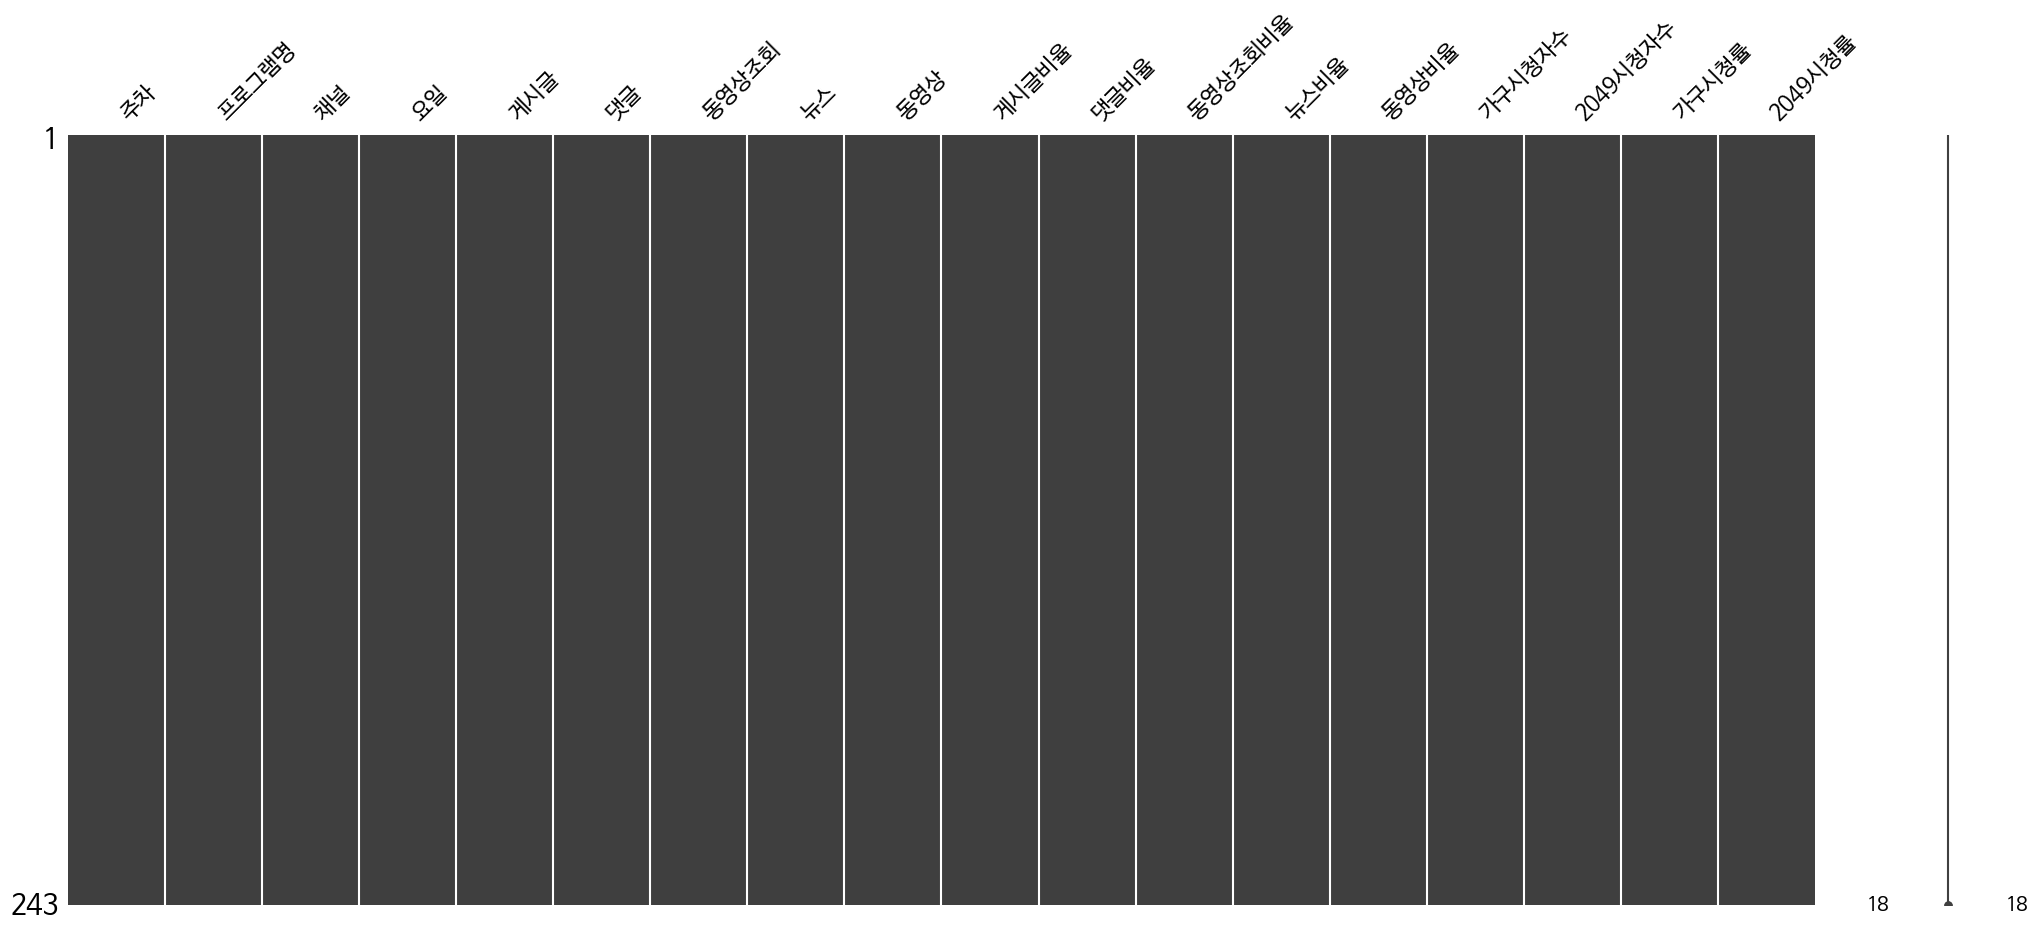

In [29]:
# 결측치 시각화
plt.rc('font', family='NanumBarunGothic')
# 폰트 설정
msno.matrix(df) # 흰색으로 표현된 빈칸들이 결측치

In [41]:
# 데이터 정제(추출): 필요한 데이터만 가져오기 > 특정 열(컹럼,속성)만 추출하여 새로운 데이터프레임 만들기
# 대괄호 [[]] 2개 사용에 주의
# '프로그램명','게시글','댓글','동영상조회','뉴스','동영상','가구시청률','2049시청률'
df_c = df[['프로그램명','게시글','댓글','동영상조회','뉴스','동영상','가구시청률','2049시청률']]
df_c.head()

,프로그램명,게시글,댓글,동영상조회,뉴스,동영상,가구시청률,2049시청률
0,* 라디오스타,589,641,268962,414,56,3.2,2.1
1,알토란,125,135,7920,38,32,0.8,0.3
2,엄지의제왕,57,35,2460,7,22,0.6,0.3
3,이제 만나러 갑니다,68,133,36498,7,27,0.9,0.3
4,불후의 명곡,1256,7148,601365,676,217,5.5,1.4


In [42]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   프로그램명    243 non-null    object 
 1   게시글      243 non-null    int64  
 2   댓글       243 non-null    int64  
 3   동영상조회    243 non-null    int64  
 4   뉴스       243 non-null    int64  
 5   동영상      243 non-null    int64  
 6   가구시청률    243 non-null    float64
 7   2049시청률  243 non-null    float64
dtypes: float64(2), int64(5), object(1)
memory usage: 15.3+ KB


In [43]:
df_c.dtypes

프로그램명       object
게시글          int64
댓글           int64
동영상조회        int64
뉴스           int64
동영상          int64
가구시청률      float64
2049시청률    float64
dtype: object

In [44]:
# '게시글' 컴럼만 추출
df_c[['게시글']]

,게시글
0,589
1,125
2,57
3,68
4,1256
...,...
238,47
239,746
240,172
241,192


In [45]:
# 원하는 컬럼의 데이터타입을 변환하는 방법
# file = file.astype({ 컬럼명 : 자료형 })
# file = file.astype({ '컬럼명' : 'int' })

# date타입으로 변경할 때에는 pd.to_datetime를 사용
# file = pd.to_datetime(file['컬럼명'])
# df_c = df_c.astype({'게시글':'int', '댓글':'int', '동영상조회':'int'})

In [46]:
df_c.dtypes

프로그램명       object
게시글          int64
댓글           int64
동영상조회        int64
뉴스           int64
동영상          int64
가구시청률      float64
2049시청률    float64
dtype: object

In [47]:
# 데이터 간 관계를 알아보기
# corr()는 속성들의 관계를 상관 계수로 나타냄
# df_c.corr()
df_c.corr(numeric_only=True)

,게시글,댓글,동영상조회,뉴스,동영상,가구시청률,2049시청률
게시글,1.000000,0.722145,0.503594,0.819000,0.521873,0.339785,0.484399
댓글,0.722145,1.000000,0.359544,0.498052,0.489031,0.244688,0.286524
동영상조회,0.503594,0.359544,1.000000,0.514852,0.625827,0.381539,0.521069
뉴스,0.819000,0.498052,0.514852,1.000000,0.481523,0.354871,0.517018
동영상,0.521873,0.489031,0.625827,0.481523,1.000000,0.503920,0.489518
가구시청률,0.339785,0.244688,0.381539,0.354871,0.503920,1.000000,0.882628
2049시청률,0.484399,0.286524,0.521069,0.517018,0.489518,0.882628,1.000000


<Axes: >

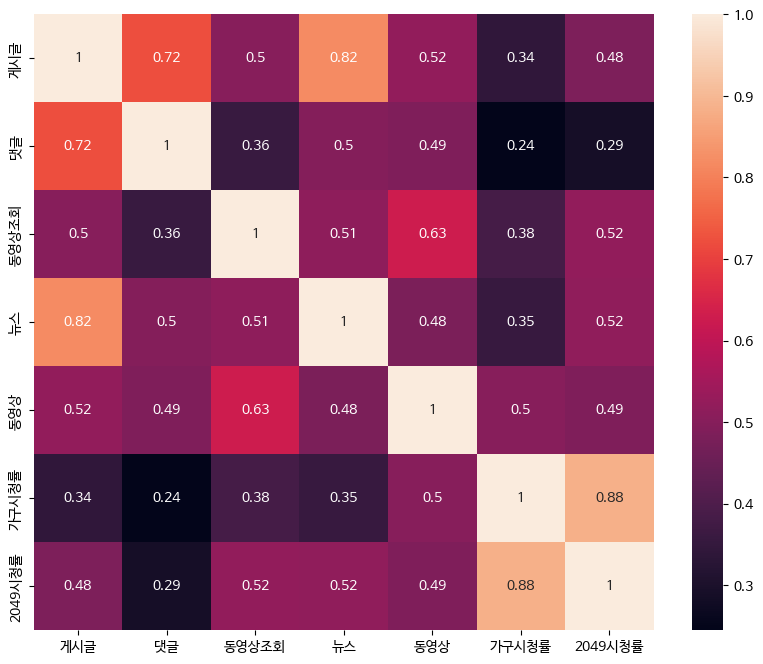

In [61]:
# 전체 데이터에 대한 시청률 속성과 다른 속성들의 관계 시각화
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') #폰트 설정
import seaborn as sns
plt.figure(figsize=(10, 8)) # 크기 조정
sns.heatmap(df_c.corr(numeric_only=True), annot=True)
# 상관계수 시각화(관련성 정도 색상으로 표시) annot=True : 상관계수 표시

In [49]:
# 시청율이 가장 높은 프로그램명 검색하고, 해당 데이터 속성 저장
df_c['프로그램명'][df_c['가구시청률']==df_c['가구시청률'].max()]

182    진짜가 나타났다!
Name: 프로그램명, dtype: object

In [54]:
# df_p에 최고시청율 프로그램 데이터 속성 저장
#
df_p = df_c[df_c['프로그램명']=='진짜가 나타났다!']
df_p

,프로그램명,게시글,댓글,동영상조회,뉴스,동영상,가구시청률,2049시청률
60,진짜가 나타났다!,546,1606,1252497,249,136,15.8,5.1
182,진짜가 나타났다!,532,1750,1678004,192,136,16.7,5.5


<ipython-input-55-f5aff7934eac>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_p.corr(), annot=True) # 상관계수 시각화
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<Axes: title={'center': '시청률이 가장 높은 프로그램의 데이터 속성 관계'}>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


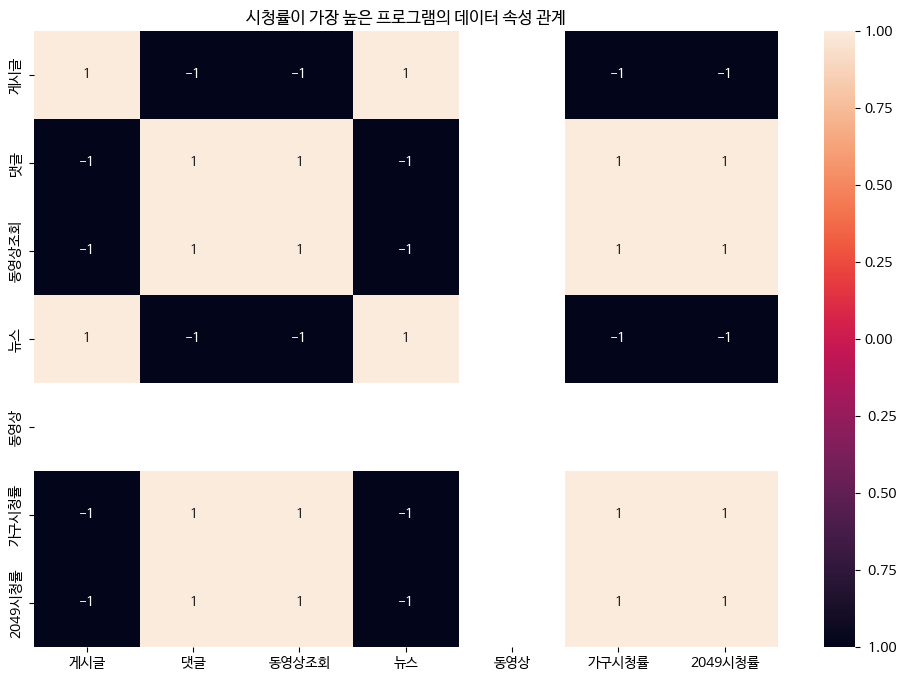

In [55]:
# 특정 프로그램에 대한 시청률 속성과 다른 속성과의 관계 시각화
plt.figure(figsize=(12, 8)) # 크기 조정
plt.title('시청률이 가장 높은 프로그램의 데이터 속성 관계') # 제목
sns.heatmap(df_p.corr(), annot=True) # 상관계수 시각화

In [56]:
# 시청률이 높은 프로그램명 검색하기> 시청율 10% 이상
df_c['프로그램명'][df_c['가구시청률']>=10]

58       금이야 옥이야
59        비밀의 여자
60     진짜가 나타났다!
180      금이야 옥이야
181       비밀의 여자
182    진짜가 나타났다!
Name: 프로그램명, dtype: object

In [57]:
#df_m에 3개의 프로그램 정보 저장 > concat() 활용

df_m=df_c[df_c['프로그램명']=='비밀의 여자']
df_m = pd.concat([df_m, df_c[df_c['프로그램명']=='진짜가 나타났다!']])
df_m = pd.concat([df_m, df_c[df_c['프로그램명']=='금이야 옥이야']])

df_m

,프로그램명,게시글,댓글,동영상조회,뉴스,동영상,가구시청률,2049시청률
59,비밀의 여자,657,2791,1359343,222,184,11.7,3.5
181,비밀의 여자,585,2215,1140448,157,178,12.2,3.6
60,진짜가 나타났다!,546,1606,1252497,249,136,15.8,5.1
182,진짜가 나타났다!,532,1750,1678004,192,136,16.7,5.5
58,금이야 옥이야,235,292,259990,46,121,13.9,3.5
180,금이야 옥이야,214,277,218493,31,95,14.1,3.5


In [58]:
# 시청률 높은 프로그램에 대한 시청률 속성과 다른 속성의 관계 시각화
plt.figure(figsize=(10, 10))
#

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<ipython-input-63-9234eae9ebaa>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_m.corr(), annot=True)


<Axes: >

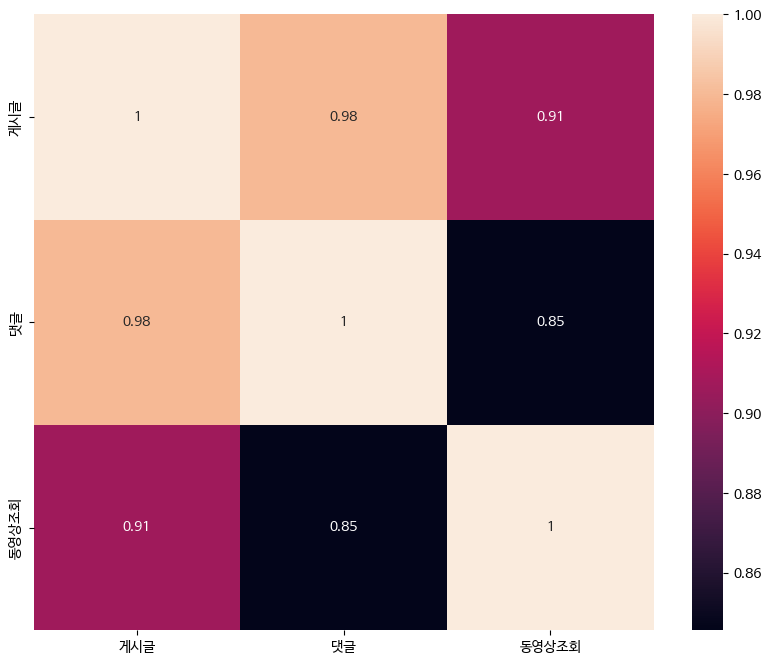

In [63]:
# 전체 데이터에 대한 시청률 속성과 다른 속성들의 관계 시각화

plt.figure(figsize=(10, 8)) # 크기 조정
sns.heatmap(df_m.corr(), annot=True)
# 상관계수 시각화(관련성 정도 색상으로 표시) annot=True : 상관계수 표시

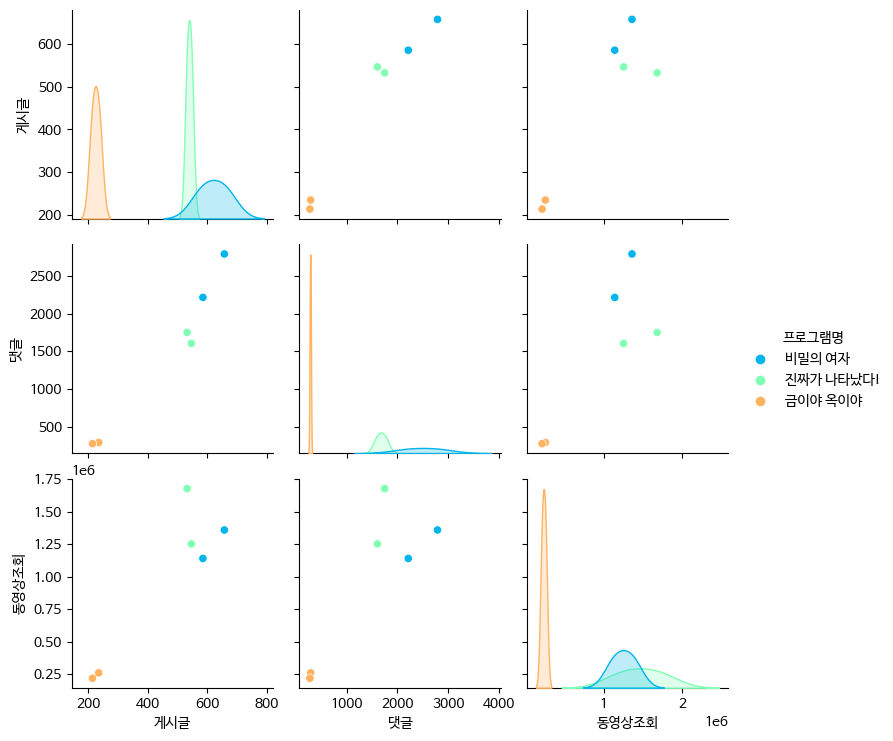

In [60]:
# 시청자 반응 데이터 속성들이 프로그램을 식별할 수 있는지 확인하기
# '프로그램명','게시글','댓글','동영상조회'
df_m=df_m[['프로그램명','게시글','댓글','동영상조회']]
sns.pairplot(data=df_m, palette='rainbow', hue='프로그램명')

### 시청률 분석으로 새롭게 알게된 사실은 무엇인가?
1. 시청률은 뉴스에 의해 크게 영향을 받는다.
2. 시청률과 댓글 수는 크게 상관관계를 가지게 된다.
3. 시청률이 높을 수록 댓글에 의한 시청률의 정도가 높아진다.

